* 한국어 데이터셋 이용
* GLUE benchmark의 한국어 버전 [KLUE benchmark](), GLUE와 마찬가지로 한국어 자연어처리에 대한 이해도를 높이기 위해 만들어진 데이터셋 benchmark
* KLUE의 dataset을 활용하는 것이 아닌, model(klue/ber-base)를 활용하여 NSMC(Naver Sentiment Movie Corpus) task를 도전

In [1]:
import tensorflow
import numpy
import transformers
import datasets
from datasets import load_dataset

### STEP 1. NSMC 데이터 분석 및 Huggingface dataset 구성


In [2]:
val_nsmc = load_dataset('nsmc', split='train[:50000]')
train_nsmc = load_dataset('nsmc', split='train[50000:]')
test_nsmc = load_dataset('nsmc', split='test')

Downloading:   0%|          | 0.00/1.36k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/807 [00:00<?, ?B/s]

Using custom data configuration default


  0%|          | 0/2 [00:00<?, ?it/s]

Downloading:   0%|          | 0.00/6.33M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.12M [00:00<?, ?B/s]

  0%|          | 0/2 [00:00<?, ?it/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset nsmc downloaded and prepared to /aiffel/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3. Subsequent calls will reuse this data.


Using custom data configuration default
Reusing dataset nsmc (/aiffel/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3)
Using custom data configuration default
Reusing dataset nsmc (/aiffel/.cache/huggingface/datasets/nsmc/default/1.1.0/bfd4729bf1a67114e5267e6916b9e4807010aeb238e4a3c2b95fbfa3a014b5f3)


### STEP 2. klue/bert-base model 및 tokenizer 불러오기

In [3]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("klue/roberta-small", num_labels=2)
tokenizer = AutoTokenizer.from_pretrained("klue/roberta-small")


Downloading:   0%|          | 0.00/545 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/260M [00:00<?, ?B/s]

Some weights of the model checkpoint at klue/roberta-small were not used when initializing RobertaForSequenceClassification: ['lm_head.layer_norm.weight', 'lm_head.layer_norm.bias', 'lm_head.dense.bias', 'lm_head.decoder.weight', 'lm_head.dense.weight', 'lm_head.decoder.bias', 'lm_head.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at klue/roberta-small and are newly initialized: ['classifier.out_proj.weight', 'classifier.dense.weight', 'cla

Downloading:   0%|          | 0.00/375 [00:00<?, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading: 0.00B [00:00, ?B/s]

Downloading:   0%|          | 0.00/173 [00:00<?, ?B/s]

In [4]:
tokenizer.tokenize(train_nsmc['document'][0])


['재미',
 '##가',
 '없',
 '##으면',
 '길',
 '##게',
 '##만',
 '##들',
 '##지도',
 '마',
 '.',
 '.',
 '.',
 '샬',
 '##리',
 '##즈',
 '##테',
 '##론',
 '내내',
 '##버',
 '##럭',
 '##하고',
 '틴',
 '##에이',
 '##저',
 '##퀸',
 '스튜어트',
 '##는',
 '앞',
 '##니',
 '##만',
 '##보이',
 '##고',
 '몰입',
 '##감',
 '##도',
 '없',
 '##고',
 '토르',
 '##는',
 '내내',
 '지저분',
 '##해서',
 '정도',
 '안',
 '##가',
 '##는데',
 '김보',
 '##성',
 '##느',
 '##낌',
 '##나',
 '##고',
 '애매',
 '##한',
 '캐릭터',
 '윌리엄',
 '##에',
 '무의미',
 '##한',
 '전투',
 '##씬',
 '##들',
 '.',
 '.',
 '억지로',
 '끼워',
 '##넣',
 '##은',
 '난장',
 '##이',
 '##들',
 '.',
 '대체',
 '뭘',
 '##위',
 '##해서',
 '?']

### STEP 3. 위에서 불러온 tokenizer으로 데이터셋 전처리 및 model 학습 

### STEP 4. Fine-tuning을 통해 모델 성능(accuracy) 향상시키기
- 모델과 토크나이저를 klue/bert-base'에서 'klue/roberta-small'로 변경

In [5]:
def transform(data):
    return tokenizer(
        data['document'],
        truncation = True,
        padding = 'max_length',
        return_token_type_ids = True,
        )

In [6]:
train_dataset = train_nsmc.map(transform, batched=True)
val_dataset = val_nsmc.map(transform, batched=True)
test_dataset = test_nsmc.map(transform, batched=True)

  0%|          | 0/100 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

  0%|          | 0/50 [00:00<?, ?ba/s]

hf_dataset = huggingface_nsmc_dataset.map(transform, batched=True)

hf_train_dataset = hf_dataset['train']
#hf_val_dataset = hf_dataset['validation']
hf_test_dataset = hf_dataset['test']

__Trainer를 활용한 학습__

In [7]:
import os
import numpy as np
from transformers import Trainer, TrainingArguments

output_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace'

training_arguments = TrainingArguments(
    output_dir,                                         # output이 저장될 경로
    evaluation_strategy="epoch",           #evaluation하는 빈도
    learning_rate = 2e-5,                         #learning_rate
    per_device_train_batch_size = 16,   # 각 device 당 batch size
    per_device_eval_batch_size = 16,    # evaluation 시에 batch size
    num_train_epochs = 3,                     # train 시킬 총 epochs
    weight_decay = 0.01,                        # weight decay
)

In [8]:
from datasets import load_metric
#metric = load_metric('glue', 'mrpc')

#def compute_metrics(eval_pred):    
#    predictions,labels = eval_pred
#    predictions = np.argmax(predictions, axis=1)
#    return metric.compute(predictions=predictions, references = labels)

def compute_metrics(pred):
    labels = pred.label_ids
    preds = pred.predictions.argmax(-1)

    m1 = load_metric('accuracy')
    m2 = load_metric('f1')

    acc = m1.compute(predictions=preds, references=labels)['accuracy']
    f1 = m2.compute(predictions=preds, references=labels)['f1']

    return {'accuracy':acc, 'f1':f1}

In [9]:
trainer = Trainer(
    model=model,           # 학습시킬 model
    args=training_arguments,           # TrainingArguments을 통해 설정한 arguments
    train_dataset=train_dataset,    # training dataset
    eval_dataset=val_dataset,       # evaluation dataset
    compute_metrics=compute_metrics,
)
trainer.train()

The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, document.
***** Running training *****
  Num examples = 100000
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 18750


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.287600,0.267173,0.893180,0.891679
2,0.228900,0.275799,0.895800,0.898043
3,0.174200,0.347173,0.900480,0.900979


Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-1000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-1500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-1500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-2000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-2000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-2000/pytorch_m

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-6500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-6500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-6500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-7000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-7000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-7000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-7500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-7500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-7500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-8000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-8000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-8000/pytorc

TrainOutput(global_step=18750, training_loss=0.23769442647298178, metrics={'train_runtime': 17116.5177, 'train_samples_per_second': 17.527, 'train_steps_per_second': 1.095, 'total_flos': 3.97402195968e+16, 'train_loss': 0.23769442647298178, 'epoch': 3.0})

* Accuracy와 F1이 약 90%에 도달함

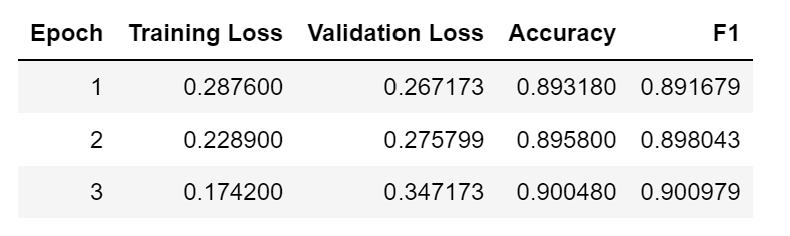

In [10]:
from transformers import Trainer, TrainingArguments, AutoModelForSequenceClassification
import torch

chck_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/checkpoint-18500'
save_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/checkpoint-18500/eval'

# Load the saved checkpoints
model = AutoModelForSequenceClassification.from_pretrained(chck_dir)

# Create a new Trainer instance for evaluation
evaluation_args = TrainingArguments(
    output_dir=save_dir,               # Same output directory as during training
    per_device_eval_batch_size=16,       # Evaluation batch size
)
eval_trainer = Trainer(
    model=model,
    args=evaluation_args,
    compute_metrics=compute_metrics,
)

# Evaluate the model on the test_dataset
eval_result = eval_trainer.evaluate(test_dataset)

# Print the evaluation result
print(eval_result)

The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 16


Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.07k [00:00<?, ?B/s]

{'eval_loss': 0.3624119460582733, 'eval_accuracy': 0.89664, 'eval_f1': 0.8975700638205097, 'eval_runtime': 831.7183, 'eval_samples_per_second': 60.117, 'eval_steps_per_second': 3.757}


학습시 저장된 checkpoint를 불러와서 test_dataset 평가

In [11]:
chck_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/checkpoint-18000'
save_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/checkpoint-18000/eval'

# Load the saved checkpoints
model = AutoModelForSequenceClassification.from_pretrained(chck_dir)

# Create a new Trainer instance for evaluation
evaluation_args = TrainingArguments(
    output_dir=save_dir,               # Same output directory as during training
    per_device_eval_batch_size=16,       # Evaluation batch size
)
eval_trainer = Trainer(
    model=model,
    args=evaluation_args,
    compute_metrics=compute_metrics,
)

# Evaluate the model on the test_dataset
eval_result = eval_trainer.evaluate(test_dataset)

# Print the evaluation result
print(eval_result)

loading configuration file /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-18000/config.json
Model config RobertaConfig {
  "_name_or_path": "klue/roberta-small",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "BertTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.11.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 32000
}

loading weights file /aiffel/aiffel/[GN08]_HuggingFace/checkpoint-180

{'eval_loss': 0.36268582940101624, 'eval_accuracy': 0.8959, 'eval_f1': 0.897456608680234, 'eval_runtime': 837.598, 'eval_samples_per_second': 59.695, 'eval_steps_per_second': 3.731}


### STEP 5. Bucketing을 적용하여 학습시키고, STEP 4의 결과와의 비교

In [14]:
from transformers import DataCollatorWithPadding

output_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/Bucketing'

"""custom bucket_batch_size를 지정하고 싶으면 아래와 같이 쓰면 됨"""
# bucket_batch_sizes = [8, 16, 32]
# bucket_batch_sizes=bucket_batch_sizes in 'training_args = TrainingArguments()'

# Define the TrainingArguments
training_args = TrainingArguments(
    output_dir=output_dir,
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    group_by_length=True,  # Enable grouping by sequence length
    dataloader_num_workers=4,
)

# Create a DataCollator
data_collator = DataCollatorWithPadding(tokenizer)

# Create the Trainer
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=val_dataset,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

# Train the model
trainer.train()

PyTorch: setting up devices
The default value for the training argument `--report_to` will change in v5 (from all installed integrations to none). In v5, you will need to use `--report_to all` to get the same behavior as now. You should start updating your code and make this info disappear :-).
The following columns in the training set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, document.
***** Running training *****
  Num examples = 100000
  Num Epochs = 3
  Instantaneous batch size per device = 16
  Total train batch size (w. parallel, distributed & accumulation) = 16
  Gradient Accumulation steps = 1
  Total optimization steps = 18750


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Epoch,Training Loss,Validation Loss,Accuracy,F1
1,0.090900,0.546226,0.887940,0.890329
2,0.123300,0.508087,0.891680,0.893310
3,0.114800,0.585833,0.894700,0.895455


Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-1000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-1000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-1000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-1500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-1500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-1500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-2000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 16


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-6500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-6500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-6500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-7000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-7000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-7000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-7500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-7500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-7500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-8000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketi

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 16


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 

Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-13000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-13000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-13000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-13500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-13500/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-13500/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-14000
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-14000/config.json
Model weights saved in /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-14000/pytorch_model.bin
Saving model checkpoint to /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-14500
Configuration saved in /aiffel/aiffel/[GN08]_HuggingFa

huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)


The following columns in the evaluation set  don't have a corresponding argument in `RobertaForSequenceClassification.forward` and have been ignored: id, document.
***** Running Evaluation *****
  Num examples = 50000
  Batch size = 16


huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The current process just got forked, after parallelism has already been used. Disabling parallelism to avoid deadlocks...
To disable this warning, you can either:
	- Avoid using `tokenizers` before the fork if possible
	- Explicitly set the environment variable TOKENIZERS_PARALLELISM=(true | false)
huggingface/tokenizers: The 



Training completed. Do not forget to share your model on huggingface.co/models =)




TrainOutput(global_step=18750, training_loss=0.0984495556640625, metrics={'train_runtime': 16965.7088, 'train_samples_per_second': 17.683, 'train_steps_per_second': 1.105, 'total_flos': 3.97402195968e+16, 'train_loss': 0.0984495556640625, 'epoch': 3.0})

In [15]:
chck_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-18500'
save_dir = os.getenv('HOME')+'/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-18500/eval'

# Load the saved checkpoints
model = AutoModelForSequenceClassification.from_pretrained(chck_dir)

# Create a new Trainer instance for evaluation
evaluation_args = TrainingArguments(
    output_dir=save_dir,               # Same output directory as during training
    per_device_eval_batch_size=16,       # Evaluation batch size
)
eval_trainer = Trainer(
    model=model,
    args=evaluation_args,
    compute_metrics=compute_metrics,
)

# Evaluate the model on the test_dataset
eval_result = eval_trainer.evaluate(test_dataset)

# Print the evaluation result
print(eval_result)

loading configuration file /aiffel/aiffel/[GN08]_HuggingFace/Bucketing/checkpoint-18500/config.json
Model config RobertaConfig {
  "_name_or_path": "/aiffel/aiffel/[GN08]_HuggingFace/checkpoint-18000",
  "architectures": [
    "RobertaForSequenceClassification"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "problem_type": "single_label_classification",
  "tokenizer_class": "BertTokenizer",
  "torch_dtype": "float32",
  "transformers_version": "4.11.3",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 32000
}

loading weights file /aiffe

{'eval_loss': 0.6123278737068176, 'eval_accuracy': 0.89036, 'eval_f1': 0.8915357524435122, 'eval_runtime': 837.003, 'eval_samples_per_second': 59.737, 'eval_steps_per_second': 3.734}


# 회고

* 기존의 __'klue/bert-base'__ 모델을 사용했을 땐, __1 epoch당 12시간__ 이 걸려서 도중에 포기하고 상대적으로 파라미터 수가 적고 모델이 가벼운 __'klue/roberta-small'__ 모델을 이용함. 해당 모델을 사용할 경우 __1 epoch당 약 4시간__ 가량 소요됨.

* 데이터 개수를 줄이지 않고 __klue/roberta-small__ 모델을 사용해 __3epoch__ 학습 시, __accuracy 와 f1 score 모두 90 %__ 에 달함.

* Bucketing Task는 시퀀스 길이가 비슷한 데이터끼리 뭉쳐서 적절한 최대 길이만큼 패딩을 진행한 후 학습하는 방식임. 패딩 토큰 양을 최소화함으로써 메모리를 효율적으로 사용할 수 있게 되어 학습 속도를 향상시키며 모델 성능 또한 개선시킬 수 있다고 함.

* __Bucketing Task__ 를 실제로 돌려보았을 때 학습속도가 조금 개선됨. __3 에폭__ 돌릴 때 __약 7시간__ 정도 걸렸으나 __성능이 크게 개선되지는 않음.__

https://nkw011.github.io/nlp/tutorial4_Fine-tune_a_pretrained_model/
